In [55]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pyne import data
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


# Open data files

In [56]:
# Open propmt TPC data file
file_dir = "./assets/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_prompt)
# Reorder columns
df_TPC_prompt = df_TPC_prompt[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

Considered delayed if created at time > 20 microseconds

In [57]:
# Open delayed TPC data file
file_dir = "./assets/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_delayed)
# Reorder columns
df_TPC_delayed = df_TPC_delayed[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

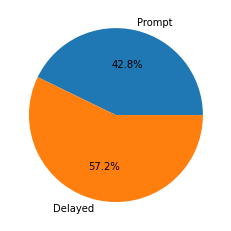

In [58]:
# Ratio of prompt to delayed counts
plt.pie(x=[df_TPC_prompt["Counts"].sum(), df_TPC_delayed["Counts"].sum()], autopct='%1.1f%%', labels=["Prompt", "Delayed"])
plt.show()

In [59]:
# Open buffer data file
file_dir = "./assets/A_Z_count-buffers.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_buffers = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_buffers)
# Reorder columns
df_buffers = df_buffers[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Add activity (/yr)

In [60]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
sim_length = 29.01
df_buffers["Activity (/yr)"] = df_buffers["Counts"] / sim_length
df_TPC_prompt["Activity (/yr)"] = df_TPC_prompt["Counts"] / sim_length
df_TPC_delayed["Activity (/yr)"] = df_TPC_delayed["Counts"] / sim_length

# Filter by unstable

In [61]:
# Ignore stable isotopes
unstable_buffers = df_buffers[df_buffers["Stable"] == False]
unstable_TPC_prompt = df_TPC_prompt[df_TPC_prompt["Stable"] == False]
unstable_TPC_delayed = df_TPC_delayed[df_TPC_delayed["Stable"] == False]

# Filter by realistic half-life

In [62]:
# 5 years * nanoseconds
upper_lim = 5 * year_in_nano
unstable_buffers = unstable_buffers[unstable_buffers["Half Life"] < upper_lim].sort_values("Half Life")
unstable_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life"] < upper_lim].sort_values("Half Life")
unstable_TPC_delayed = unstable_TPC_delayed[unstable_TPC_delayed["Half Life"] < upper_lim].sort_values("Half Life")

# Unstable in buffer
To look for gamma rays

In [66]:
print(f"Total Activity (/yr): {unstable_TPC_delayed['Activity (/yr)'].sum()}")
unstable_buffers.sort_values("Max Q-Value", ascending=False)

Total Activity (/yr): 69985.4877628404


,Symbol,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life,"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr)
36,B,B 5-14,5,14,3,1.241304e-07,False,1.250000e-02,"[[B-, 1.0, 20.644]]",20.644,red,0.103413
24,Li,Li 3-11,3,11,3,1.241304e-07,False,8.750000e-03,"[[B-, 1.0, 20.623], [BN, 0.83, 20.119], [B2N, ...",20.623,red,0.103413
140,Al,Al 13-36,13,36,1,4.137680e-08,False,9.000000e-02,"[[B-, 1.0, 18.264], [BN, 0.31, 12.071]]",18.264,red,0.034471
15,B,B 5-8,5,8,16,6.620289e-07,False,7.700000e-01,"[[EC, 1.0, 17.98], [EA, 1.0, 0.0]]",17.980,red,0.551534
59,N,N 7-20,7,20,3,1.241304e-07,False,1.360000e-01,"[[B-, 1.0, 17.968], [BN, 0.429, 10.359]]",17.968,red,0.103413
...,...,...,...,...,...,...,...,...,...,...,...,...
37,C,C 6-14,6,14,1001,4.141818e-05,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,34.505343
32,Be,Be 4-13,4,13,5,2.068840e-07,False,2.700000e-21,"[[N, None, 0.1]]",0.100,red,0.172354
14,Be,Be 4-8,4,8,2511,1.038972e-04,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,86.556360
20,Li,Li 3-10,3,10,6,2.482608e-07,False,0.000000e+00,"[[N, 1.0, 0.025]]",0.025,red,0.206825


# Look for important unstable isotopes in TPC
For any late decays

In [67]:
unstable_TPC_delayed[unstable_TPC_delayed["Activity (/yr)"] >= 0.1].sort_values("Activity (/yr)", ascending=False)

,Symbol,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life,"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr)
90,Ar,Ar 18-41,18,41,1782634,2.352138e-01,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,61448.948638
86,Ar,Ar 18-39,18,39,168570,2.224237e-02,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,5810.754912
79,Ar,Ar 18-37,18,37,47849,6.313549e-03,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,1649.396760
81,Cl,Cl 17-38,17,38,14504,1.913764e-03,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,499.965529
70,S,S 16-35,16,35,5090,6.716121e-04,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,175.456739
59,P,P 15-32,15,32,4718,6.225276e-04,False,1.230000e+06,"[[B-, 1.0, 1.71]]",1.710,red,162.633575
44,Al,Al 13-28,13,28,1568,2.068935e-04,False,1.340000e+02,"[[B-, 1.0, 4.642]]",4.642,red,54.050327
77,S,S 16-37,16,37,1011,1.333988e-04,False,3.030000e+02,"[[B-, 1.0, 4.865]]",4.865,red,34.850052
34,Na,Na 11-24,11,24,767,1.012036e-04,False,5.400000e+04,"[[B-, 1.0, 5.515]]",5.515,red,26.439159
65,P,P 15-34,15,34,674,8.893252e-05,False,1.240000e+01,"[[B-, 1.0, 5.374]]",5.374,red,23.233368
